# Cinetique du vide

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tuftelike
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

In [2]:
from options import *
import matplotlib as mpl

# mpl.use('pgf')
mpl.rcParams.update(rcParams)

## Pompe à palettes

In [3]:
data = np.loadtxt("../data/palette.csv", float, delimiter=",", skiprows=1)
time = data[:,0]  # s
pressure = unp.uarray(data[:,1], data[:,2])  # mbar
V = ufloat(5.5, 0.05)  # L

In [22]:
p1 = pressure[10]
idx = time < 100
plim = ufloat(1e-2, 1e-3)
plog = unp.log((pressure[idx] - plim) / (p1 - plim))

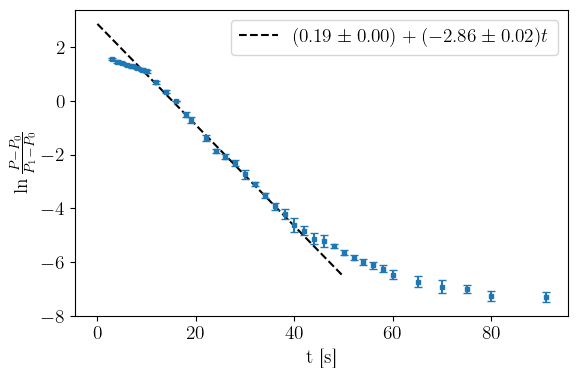

In [23]:
coefs, cov = np.polyfit(time[idx][10:21], unp.nominal_values(plog[10:21]), 1, cov=True)
fit = np.poly1d(coefs)
errcoefs = unp.uarray(-coefs, cov[(0,1),(0,1)])
delta_t = time[idx][20] - time[idx][10]
x = np.linspace(0, 50, 100)

plt.plot(x, fit(x), '--', c='k', label=r"$({:.2fL})+({:.2fL})t$".format(*errcoefs))

plt.errorbar(time[idx], unp.nominal_values(plog), yerr=unp.std_devs(plog), marker='s', ls='none')
plt.xlabel(r"t [\unit{\second}]")
plt.ylabel(r"$\ln{\frac{P - P_0}{P_1 - P_0}}$")
plt.legend()

plt.tight_layout()
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,0))
plt.savefig("../figures/cinetique_palettes.pdf")

In [24]:
S = -V * errcoefs[1] / delta_t
S

0.787286652046377+/-0.008575342262383075

## Pompe à diffusion

In [25]:
data = np.loadtxt("../data/diffusion.csv", float, delimiter=",", skiprows=1)
time = data[:,0]  # s
pressure = unp.uarray(data[:,1], data[:,2])  # mbar
V = ufloat(5.5, 0.05)  # L

FileNotFoundError: ../data/diffusion.csv not found.

In [ ]:
p1 = pressure[...]
idx = time < 100
plim = ufloat(1.2e-5, 1e-6)
plog = unp.log((pressure[idx] - plim) / (p1 - plim))

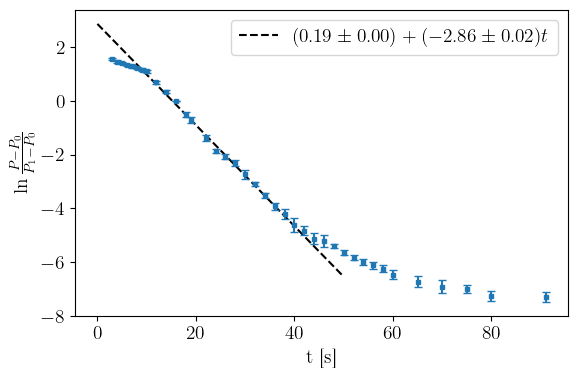

In [ ]:
coefs, cov = np.polyfit(time[idx][10:21], unp.nominal_values(plog[10:21]), 1, cov=True)
fit = np.poly1d(coefs)
errcoefs = unp.uarray(-coefs, cov[(0,1),(0,1)])
delta_t = time[idx][20] - time[idx][10]
x = np.linspace(0, 50, 100)

plt.plot(x, fit(x), '--', c='k', label=r"$({:.2fL})+({:.2fL})t$".format(*errcoefs))

plt.errorbar(time[idx], unp.nominal_values(plog), yerr=unp.std_devs(plog), marker='s', ls='none')
plt.xlabel(r"t [\unit{\second}]")
plt.ylabel(r"$\ln{\frac{P - P_0}{P_1 - P_0}}$")
plt.legend()

plt.tight_layout()
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,0))
plt.savefig("../figures/cinetique_palettes.pdf")

In [ ]:
S = -V * errcoefs[1] / delta_t
S

0.787286652046377+/-0.008575342262383075